In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./dataset/df_procesado.csv')

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

### Separo el dataset inicial en uno de entrenamiento y otro de testeo

In [8]:
train,test = train_test_split(df,test_size=0.2,random_state=42)


In [9]:
X,y = train.drop(columns=['CASO']),train['CASO']

In [10]:
escalado = StandardScaler()
X = escalado.fit_transform(X)   

### Con los datos separados hare una validacion cruzada para distintos modelos

Arbol de decision

In [11]:
tree_model = DecisionTreeClassifier(max_depth=12,criterion='gini')
cros_val_tree = cross_val_score(tree_model,X,y,cv=5)
lin_rmse_scores = np.mean(cros_val_tree)
lin_rmse_scores

0.9711355311355312

KNN

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=7)
cros_val_knn= cross_val_score(knn_model,X,y,cv=5)
lin_rmse_scores = np.mean(cros_val_knn)
lin_rmse_scores

0.9512087912087912

Ramdom Forest

In [13]:
forest_model = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_model,X,y, cv=5)
lin_rmse_scores = np.mean(forest_scores)
lin_rmse_scores

0.9822466422466423

### Para esos 3 modelos el de ramdom forest dio el mayor score, por esto voy usar un grid search sobre este para optimizar parametros

In [14]:
forest_model = RandomForestClassifier(random_state=42)
grilla_arbol = {
        'n_estimators':[50,100,150,200,300]
}
grid_arbol = GridSearchCV(forest_model,param_grid=grilla_arbol,cv=5)
grid_arbol.fit(X,y)

ramdom_best_model = grid_arbol.best_estimator_



In [15]:
grid_arbol.best_params_

{'n_estimators': 300}

### Ahora que se encontro al mejor modelo se lo evaluaria con los datos de prueba, a estos antes hay que hacerle un standar scale

In [16]:
X_test,y_test = test.drop(columns=['CASO']),test['CASO']
escalado = StandardScaler()
X_test = escalado.fit_transform(X_test)   

In [17]:
y_predicho = ramdom_best_model.predict(X_test)

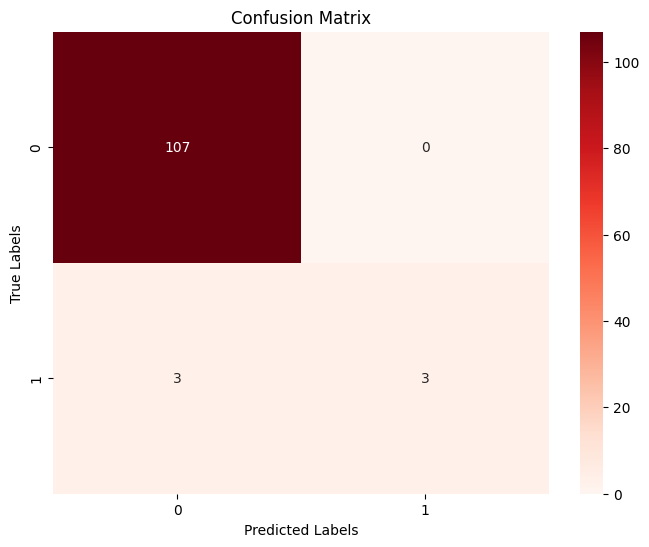

In [18]:

confusion = confusion_matrix(y_test, y_predicho)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Reds',)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
print(classification_report(y_test, y_predicho))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       107
         1.0       1.00      0.50      0.67         6

    accuracy                           0.97       113
   macro avg       0.99      0.75      0.83       113
weighted avg       0.97      0.97      0.97       113



### A partir del modelo de Ramdom Forest, y usando un gridsearch se econtraron 300 estimadores como el mejor modelo.

### Al evaluar el modelo usando matriz de confusion y un cuadro de distintas metricas se pueden observar resultados positivos

### Aun asi, para un analisis mas profunso, al ser un modelo que intenta diagnosticar una enfermedad, una de las metricas mas importante sera el recall ya que nos indicara que tan bueno es tratando los falsos negativos (que son los mas preocupantes)

### Recall: 50% Esto significa que del total de personas enfermas, mi modelo solo predice el 50% lo que es bastante malo

### Precision: 100% Como se ve el modelo, todas sus predicciones positivas son correctas


### Se procede a guardar el modelo

In [24]:
import joblib

joblib.dump(ramdom_best_model,'modelo_hospitalizacion.plk')

['modelo_hospitalizacion.plk']